In [5]:
import pandas as pd


batting = pd.read_csv("../DATA/batting.csv") 
fielding = pd.read_csv("../DATA/fielding.csv")
hall_of_fame = pd.read_csv("../DATA/hall_of_fame.csv")
player_award = pd.read_csv("../DATA/player_award.csv")
player = pd.read_csv("../DATA/player.csv")
salary = pd.read_csv("../DATA/salary.csv")
team = pd.read_csv("../DATA/team.csv")

table_files = [batting, fielding, hall_of_fame, player_award, player, salary, team]
for file in table_files:
    print(file.head(5))


##  MODIFICATIONS

#Creation of batting_2 table
batting_2 = batting[(batting['hr'].notnull()) & (batting['hr'] > 0) & (batting['ab'].notnull()) & (batting['ab'] > 0)]
batting_2.to_csv('batting_2.csv', index=False)

#Altering player table
player['full_name'] = player['name_first'] + ' ' + player['name_last']  

   player_id  year  stint team_id league_id   g     ab     r     h  double  \
0  abercda01  1871      1     TRO       NaN   1    4.0   0.0   0.0     0.0   
1   addybo01  1871      1     RC1       NaN  25  118.0  30.0  32.0     6.0   
2  allisar01  1871      1     CL1       NaN  29  137.0  28.0  40.0     4.0   
3  allisdo01  1871      1     WS3       NaN  27  133.0  28.0  44.0    10.0   
4  ansonca01  1871      1     RC1       NaN  25  120.0  29.0  39.0    11.0   

   ...   rbi   sb   cs   bb   so  ibb  hbp  sh  sf  g_idp  
0  ...   0.0  0.0  0.0  0.0  0.0  NaN  NaN NaN NaN    NaN  
1  ...  13.0  8.0  1.0  4.0  0.0  NaN  NaN NaN NaN    NaN  
2  ...  19.0  3.0  1.0  2.0  5.0  NaN  NaN NaN NaN    NaN  
3  ...  27.0  1.0  1.0  0.0  2.0  NaN  NaN NaN NaN    NaN  
4  ...  16.0  6.0  2.0  2.0  1.0  NaN  NaN NaN NaN    NaN  

[5 rows x 22 columns]
   player_id  year  stint team_id league_id pos   g  gs  inn_outs    po     a  \
0  abercda01  1871      1     TRO       NaN  SS   1 NaN       NaN  

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\vicen\AppData\Local\Temp\ipykernel_23184\53166323.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batting_2['batting_avg'] = batting_2['h'] / batting_2['ab']


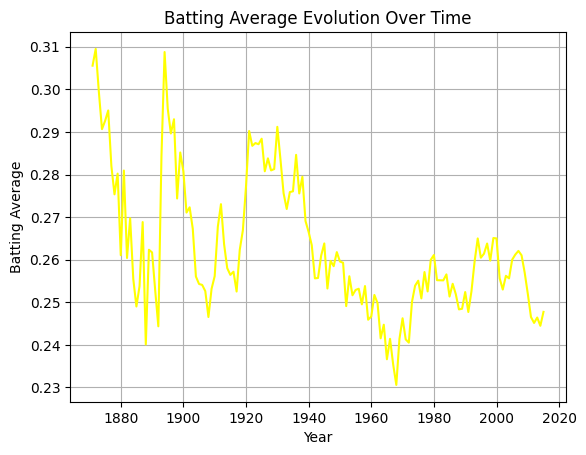

In [7]:
# Batting Average Evolution Over Time
""" Here we find a clear downtrend on the batting average of players throughout the years. Several factors might contribute to this trend, such as evolving game strategies emphasizing pitching excellence, improvements in pitching techniques and training.
"""
batting_2['batting_avg'] = batting_2['h'] / batting_2['ab']
batting_avg_grouped = batting_2.groupby('year')['batting_avg'].mean().reset_index()
batting_avg_grouped

sns.lineplot(batting_avg_grouped, x='year', y='batting_avg', color='yellow')
plt.xlabel('Year')
plt.ylabel('Batting Average')
plt.title('Batting Average Evolution Over Time')
plt.grid(True)

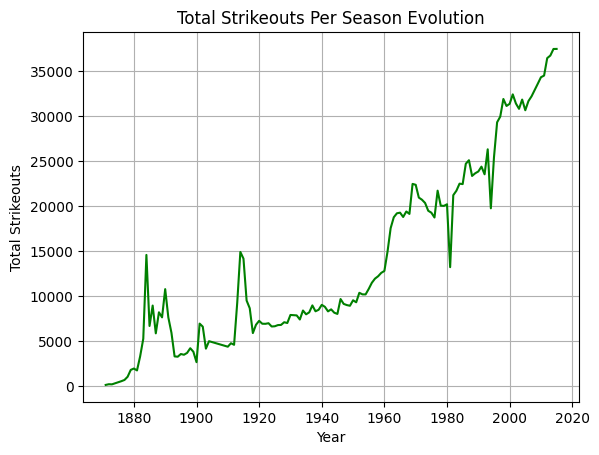

In [8]:
# Strikeouts Per Year Evolution
"""The upward trend in strikeouts aligns with the previous observation of declining batting averages, indicating a shift towards a game style that prioritizes power pitching. This trend reflects a strategic emphasis on pitching dominance and a preference for a style of play centered around power and precision on the mound.
"""

tot_strikes_per_year = team[(team['so']!=0) & (team['so'].notna())].groupby('year')['so'].sum().reset_index()
tot_strikes_per_year

sns.lineplot(data = tot_strikes_per_year, x = 'year', y = 'so', color='green')
plt.xlabel('Year')
plt.ylabel('Total Strikeouts')
plt.title('Total Strikeouts Per Season Evolution')
plt.grid(True)

C:\Users\vicen\AppData\Local\Temp\ipykernel_23184\2073913417.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(hitters, x='hr', y='full_name', palette= 'bright')


Text(0, 0.5, 'Players')

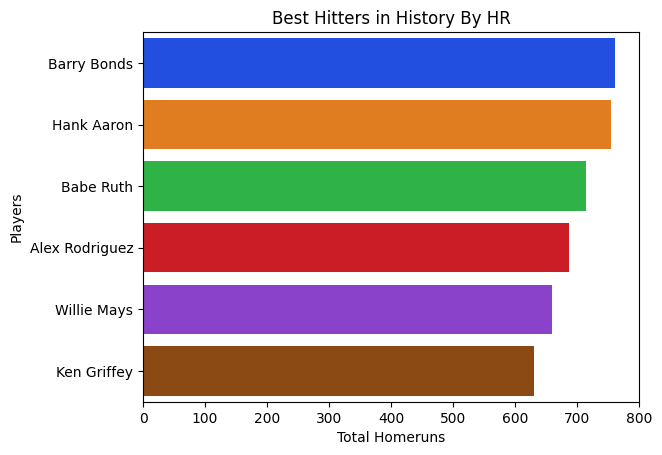

In [9]:
merged_df = pd.merge(batting_2, player, on = 'player_id')
hitters = merged_df.groupby(['player_id', 'name_first','name_last'])['hr'].sum().reset_index().sort_values(by='hr', ascending=False).head(6).reset_index(drop=True)
hitters['full_name'] = hitters['name_first'] + ' ' + hitters['name_last']
hitters = hitters[[ 'full_name', 'hr']]
hitters

sns.barplot(hitters, x='hr', y='full_name', palette= 'bright')

plt.title('Best Hitters in History By HR')
plt.xlabel('Total Homeruns')
plt.ylabel('Players')


C:\Users\vicen\AppData\Local\Temp\ipykernel_23184\130957233.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(result_df, x='pos', y='salary', palette='bright')


Text(0, 0.5, 'Average Salary in $Mn')

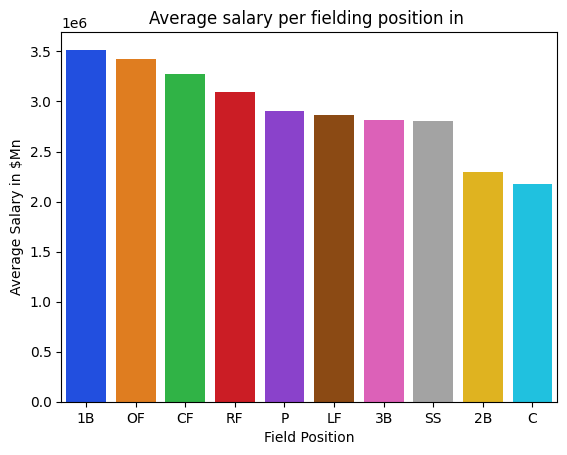

In [10]:
merged_df = pd.merge(salary, fielding, on = 'player_id')
filtered_df = merged_df[merged_df['year_y']>=2000].groupby('pos')['salary'].mean().reset_index()
result_df = filtered_df.sort_values(by='salary', ascending=False).reset_index(drop=True)
result_df

sns.barplot(result_df, x='pos', y='salary', palette='bright')
plt.title('Average salary per fielding position in ')
plt.xlabel('Field Position')
plt.ylabel('Average Salary in $Mn')

C:\Users\vicen\AppData\Local\Temp\ipykernel_23184\2770021844.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(avg_salaries_per_team, x='team_id', y= 'salary', palette='viridis')


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, 'LAN'),
  Text(1, 0, 'NYA'),
  Text(2, 0, 'DET'),
  Text(3, 0, 'SFN'),
  Text(4, 0, 'BOS'),
  Text(5, 0, 'WAS'),
  Text(6, 0, 'SEA'),
  Text(7, 0, 'TEX'),
  Text(8, 0, 'SLN'),
  Text(9, 0, 'SDN'),
  Text(10, 0, 'TOR'),
  Text(11, 0, 'LAA'),
  Text(12, 0, 'MIN'),
  Text(13, 0, 'PHI'),
  Text(14, 0, 'CIN'),
  Text(15, 0, 'CHA'),
  Text(16, 0, 'KCA'),
  Text(17, 0, 'CHN'),
  Text(18, 0, 'BAL'),
  Text(19, 0, 'NYN'),
  Text(20, 0, 'COL'),
  Text(21, 0, 'MIL'),
  Text(22, 0, 'PIT'),
  Text(23, 0, 'CLE'),
  Text(24, 0, 'ATL'),
  Text(25, 0, 'MIA'),
  Text(26, 0, 'OAK'),
  Text(27, 0, 'HOU'),
  Text(28, 0, 'TBA'),
  Text(29, 0, 'ARI')])

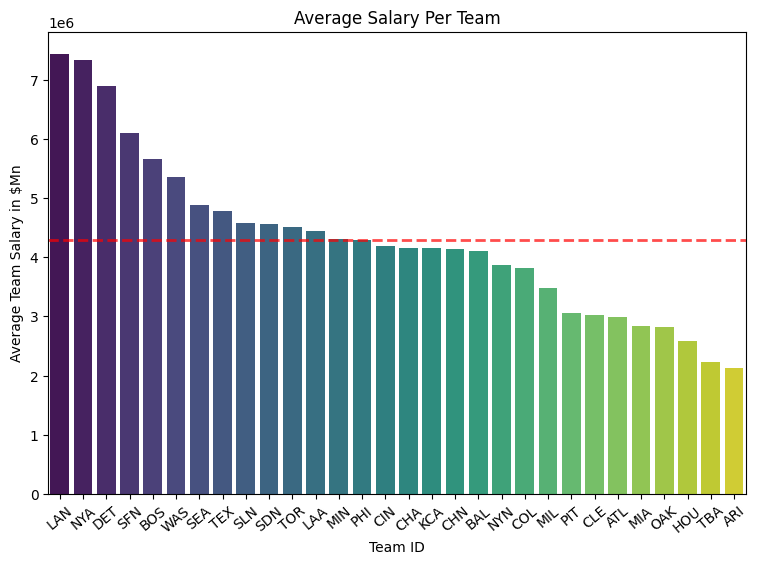

In [11]:
salary_2015 = salary[salary['year'] == 2015]
avg_salaries_per_team = salary_2015.groupby('team_id')['salary'].mean().reset_index().sort_values(by='salary', ascending=False).reset_index(drop=True)
avg_salaries_per_team

avg_league_salary = avg_salaries_per_team['salary'].mean()  #The Average League´s Salary is: $4292866.75

plt.figure(figsize=(9,6))
sns.barplot(avg_salaries_per_team, x='team_id', y= 'salary', palette='viridis')

plt.axhline(y=avg_league_salary, xmin=0, xmax=1, linestyle='--', linewidth=2, color='red', alpha=0.7)

plt.xlabel('Team ID')
plt.ylabel('Average Team Salary in $Mn')
plt.title('Average Salary Per Team')
plt.xticks(rotation=40)

C:\Users\vicen\AppData\Local\Temp\ipykernel_23184\3512136210.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['batting_avg'] = df_filtered['h'] / df_filtered['ab']


Text(0, 0.5, 'ab')

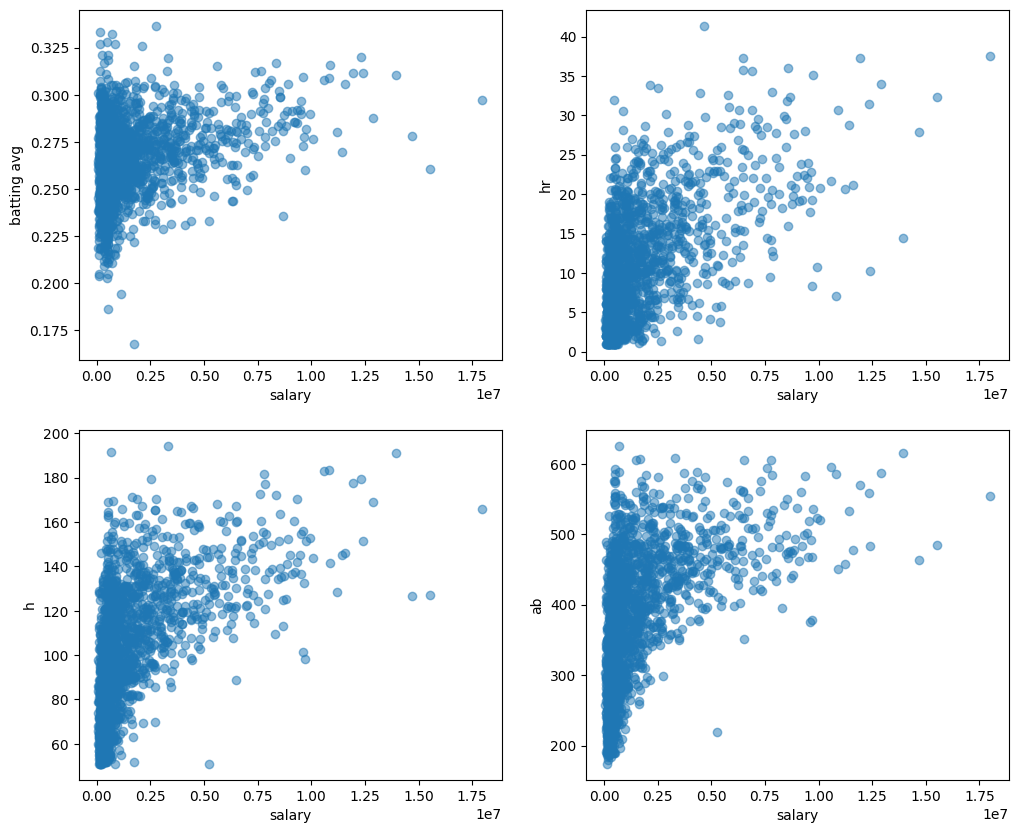

In [12]:
df_merged = pd.merge(salary, batting_2, on='player_id')

# Filtering the data based on conditions
df_filtered = df_merged[(df_merged['ab'] > 50) & (df_merged['h'] > 50)]

# Calculating batting average
df_filtered['batting_avg'] = df_filtered['h'] / df_filtered['ab']

# This calculates the average values of 'batting_avg', 'h', 'hr', 'ab', and 'salary' for each player over the seasons
df_grouped = df_filtered.groupby('player_id')[['batting_avg', 'h', 'hr', 'ab', 'salary']].mean()
df_result = df_grouped.reset_index()
df_result

fig, axs = plt.subplots(2, 2, figsize=(12, 10))
plt.subplot(2,2,1)
plt.scatter(data = df_result, x = 'salary', y = 'batting_avg', alpha=0.5 )
plt.xlabel('salary')
plt.ylabel('batting avg')

plt.subplot(2,2,2)
plt.scatter(data = df_result, x = 'salary', y ='hr', alpha=0.5)
plt.xlabel('salary')
plt.ylabel('hr')

plt.subplot(2,2,3)
plt.scatter(data = df_result, x = 'salary', y ='h', alpha = 0.5)
plt.xlabel('salary')
plt.ylabel('h')

plt.subplot(2,2,4)
plt.scatter(data = df_result, x = 'salary', y ='ab', alpha = 0.5)
plt.xlabel('salary')
plt.ylabel('ab')


Text(0, 0.5, 'Height')

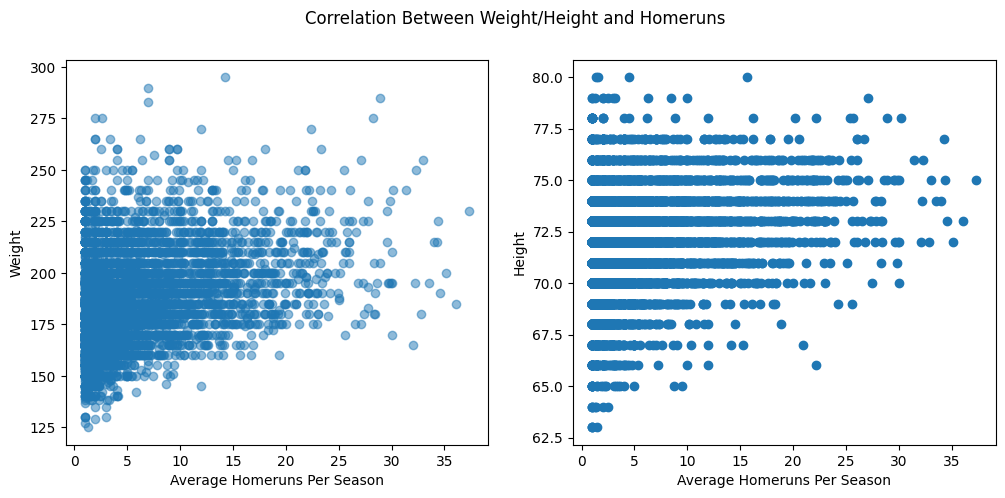

In [14]:
df_merged = pd.merge(player, batting_2, on = 'player_id')
df_filtered = df_merged[df_merged['ab']>50]
df_result = df_filtered.groupby('player_id')[['hr', 'weight', 'height']].mean()
df_result

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

plt.suptitle('Correlation Between Weight/Height and Homeruns')
plt.subplot(1,2,1)
plt.scatter(data=df_result, x='hr', y='weight', alpha=0.5)
plt.xlabel('Average Homeruns Per Season')
plt.ylabel('Weight')

plt.subplot(1,2,2)
plt.scatter(data=df_result, x='hr', y='height')
plt.xlabel('Average Homeruns Per Season')
plt.ylabel('Height')